In [1]:
import numpy as np

from pysketcher import (
    Curve,
    Figure,
    Force,
    LinearDimension,
    Moment,
    Point,
    Rectangle,
    SimpleSupport,
    Style,
    Text,
    UniformLoad,
)
from pysketcher.backend.matplotlib import MatplotlibBackend
from pysketcher.composition import Composition



In [215]:
def Simple_Cantilever() -> None:
    
    L = 8.0
    H = 1.0
    x_pos = 2.0
    y_pos = 3.0

    fig = Figure(0, x_pos + 1.2 * L, 0, y_pos + 5 * H, MatplotlibBackend)

    p0 = Point(x_pos, y_pos)
    main = Rectangle(p0, L, H).set_fill_pattern(Style.FillPattern.UP_LEFT_TO_RIGHT)
    h = L / 16  # size of support, clamped wall etc
    clamped = Rectangle(p0 + Point(L, 0) - Point(0, 2 * h), h, 6 * h).set_fill_pattern(
        Style.FillPattern.UP_RIGHT_TO_LEFT
    )
    F_pt = Point(p0.x + L / 2, p0.y + H)
    force = Force("$F$", F_pt + Point(0, H), F_pt).set_line_width(3)
    L_dim = LinearDimension(
        "$L$", Point(p0.x, p0.y - 3 * h), Point(x_pos + L, p0.y - 3 * h)
    )
    beam = Composition(
        {
            "main": main,
            "clamped end": clamped,
            "force": force,
            "L": L_dim,
        }
    )

    fig.add(beam)
    fig.show()



C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()
C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()


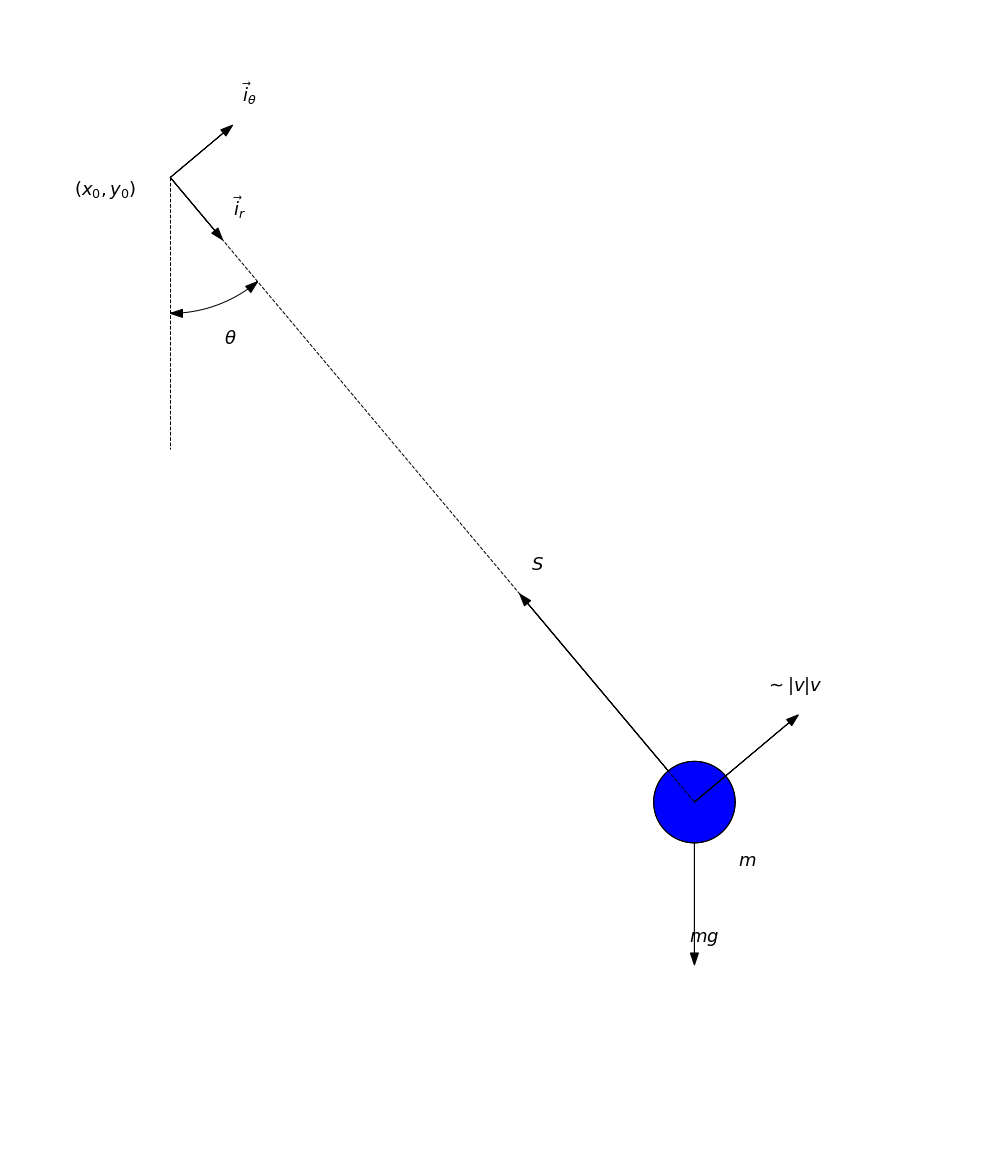

In [9]:
import logging

import numpy as np

import pysketcher as ps
from pysketcher.backend.matplotlib import MatplotlibBackend

H = 7.0
W = 6.0

logging.basicConfig(level=logging.INFO)


def main() -> None:
    L = 5 * H / 7  # length
    P = ps.Point(W / 6, 0.85 * H)  # rotation point
    a = 2 * np.pi / 9  # angle

    vertical = ps.Line(P, P - ps.Point(0, L))
    path = ps.Arc(P, L, -np.pi / 2, a)
    mass_pt = path.end
    rod = ps.Line(P, mass_pt)

    mass = ps.Circle(mass_pt, L / 20.0)
    theta = ps.AngularDimension(
        r"$\theta$", P + ps.Point(0, -L / 4), P + (mass_pt - P).unit_vector * (L / 4), P
    )
    theta.extension_lines = False

    rod_vec = rod.end - rod.start
    unit_rod_vec = rod_vec.unit_vector
    mass_symbol = ps.Text("$m$", mass_pt + unit_rod_vec * (L / 10.0))

    length = ps.LinearDimension("$L$", mass_pt, P)
    gravity = ps.Gravity(start=P + ps.Point(0.8 * L, 0), length=L / 3)

    def set_dashed_thin_blackline(*objects: ps.Shape):
        """Set linestyle of objects to dashed, black, width=1."""
        for obj in objects:
            obj.set_line_style(ps.Style.LineStyle.DASHED)
            obj.set_line_color(ps.Style.Color.BLACK)
            obj.set_line_width(1)

    set_dashed_thin_blackline(vertical, path)
    mass.style.fill_color = ps.Style.Color.BLUE

    model = ps.Composition(
        {
            "vertical": vertical,
            "path": path,
            "theta": theta,
            "rod": rod,
            "body": mass,
            "m": mass_symbol,
            "g": gravity,
            "L": length,
        }
    )

    fig = ps.Figure(0.0, W, 0.0, H, backend=MatplotlibBackend)
    fig.add(model)
    fig.show()

    vertical2 = ps.Line(rod.start, rod.start + ps.Point(0.0, -L / 3.0))
    set_dashed_thin_blackline(vertical2)
    set_dashed_thin_blackline(rod)
    angle2 = ps.Arc(rod.start, L / 6, -np.pi / 2, a)
    angle2.style.arrow = ps.Style.ArrowStyle.DOUBLE
    angle2_label = ps.ArcAnnotation(r"$\theta$", angle2)

    mg_force = ps.Force(
        "$mg$",
        mass_pt,
        mass_pt + ps.Point(0.0, -L / 5.0),
        text_position=ps.TextPosition.END,
    )
    rod_force = ps.Force(
        "$S$",
        mass_pt,
        mass_pt - rod_vec.unit_vector * (L / 3.0),
        text_position=ps.TextPosition.END,
    )

    mass.style.fill_color = ps.Style.Color.BLUE

    body_diagram_shapes = {
        "$mg$": mg_force,
        "S": rod_force,
        "rod": rod,
        "vertical": vertical2,
        "theta": angle2,
        "theta_label": angle2_label,
        "body": mass,
        "m": mass_symbol,
    }

    air_force = ps.Force(
        r"${\sim}|v|v$",
        mass_pt,
        mass_pt + rod_vec.normal * (L / 6.0),
        text_position=ps.TextPosition.END,
        # spacing = Point(0.04, 0.005),
    )

    body_diagram_shapes["air"] = air_force

    x0y0 = ps.Text("$(x_0,y_0)$", P + ps.Point(-0.4, -0.1))

    ir = ps.Force(
        r"$\vec{i}_r$",
        P,
        P + rod_vec.unit_vector * (L / 10.0),
        text_position=ps.TextPosition.END,
    )

    ith = ps.Force(
        r"$\vec{i}_{\theta}$",
        P,
        P + rod_vec.normal * (L / 10.0),
        text_position=ps.TextPosition.END,
    )

    body_diagram_shapes["ir"] = ir
    body_diagram_shapes["ith"] = ith
    body_diagram_shapes["origin"] = x0y0

    fig.erase()
    body_diagram = ps.Composition(body_diagram_shapes)
    fig.add(body_diagram)
    fig.show()


if __name__ == "__main__":
    main()

# MAIN CODE

In [302]:
import numpy as np
import pandas as pd
from pysketcher import (
    Curve,
    Figure,
    Force,
    LinearDimension,
    Moment,
    Point,
    Rectangle,
    SimpleSupport,
    Style,
    Text,
    UniformLoad,
    Circle)
from pysketcher.backend.matplotlib import MatplotlibBackend
from pysketcher.composition import Composition
import plotly.graph_objects as go

class Beam:    
    """
    Creates a customizable beam object, also includes methods to present the Freebody Diagram
    and perform calculations as desired
    """
    
    x_pos = 2.0
    y_pos = 3.0
    p0 = Point(x_pos, y_pos)
    
    def __init__(self, length, height):
        """
        Initializing the beam properties, additional properties will be added on top
        as the user desires.
        length: [m]
        height: [m]
        """
        
        self.length = length
        self.height = height
        self.main = Rectangle(self.p0, length, height).set_fill_pattern(Style.FillPattern.UP_LEFT_TO_RIGHT)
        self.composition={"main": self.main}
        #self.force_dictionary={}
        self.force_dictionary={'magnitude':[],'position':[],'type':[]}
        #self.moment_dictionary={}
        self.moment_dictionary={'magnitude':[],'position':[],'name':[]}
        #self.support_dictionary={}
        self.support_dictionary={'magnitude':[],'position':[],'type':[]}
        self.UDL_dictionary = {'magnitude':[],'position':[],'distributed_load':[], 'end_position':[]}
        self.support_exist = False
        
    def point_force(self,name,position,magnitude):
        """
        Add a point force at any point along the beam, forces have to be named.
        Throw error for forces outside the beams length
        position: [m]
        magnitude: [N]
        """
        
        if position>self.length or position<0:
            raise ValueError("Force must be placed within the beam")
        F_pt = Point(self.p0.x + position, self.p0.y + self.height)
        #Use these magnitudes later on to do calculations
        #self.force_dictionary[name] = [-1*magnitude,position,'force']
        self.force_dictionary['magnitude'].append(-1*magnitude)
        self.force_dictionary['position'].append(position)
        self.force_dictionary['type'].append('PT')
        force_drawing = Force(f"${name}$", F_pt + Point(0, self.height), F_pt).set_line_width(3)
        self.composition[name] = force_drawing
        

        
    def uniform_load(self,name,start,end,distributed_load):
        """
        Adds a distributed load ontop of the beam. The force has to be named.
        An error is thrown if the uniform load is incorrectly defined or placed outside of bounds
        distributed load: [N/m]
        start and end: [m]
        """
        
        if start>self.length or start<0 or end > self.length:
            raise ValueError("Force must be placed within the beam")
        elif end<=start:
            raise ValueError("Force must end else where")
            
        load = UniformLoad(self.p0 + Point(start, self.height), end - start, self.height)
        magnitude = (end-start)*distributed_load
        position = (end-start)/2 + start
        #self.force_dictionary[name] = [-1*magnitude,position,'force']
        self.force_dictionary['magnitude'].append(-1*magnitude)
        self.force_dictionary['position'].append(position)
        self.force_dictionary['type'].append('UDL')
        self.UDL_dictionary['magnitude'].append(-1*magnitude)
        self.UDL_dictionary['position'].append(start)
        self.UDL_dictionary['distributed_load'].append(-1*distributed_load)
        self.UDL_dictionary['end_position'].append(end)
        self.composition[name] = load
        
    def moment(self,name,position,magnitude):
        """
        Add a couple or moment anywhere along the beam.
        position: [m]
        magnitude: [N*m]
        """
        
        if position>self.length or position<0:
            raise ValueError("Moment must be placed within the beam")
        M1 = Moment(f"${name}$",center=self.p0 + Point(position, self.height/2),
                        radius= self.height/ 2)
        self.composition[name] = M1
        self.moment_dictionary['magnitude'].append(magnitude)
        self.moment_dictionary['position'].append(position)
        self.moment_dictionary['name'].append(name)
        #self.moment_dictionary[name] = [magnitude,position,'moment']

    def fixed_support(self,name,position):
        """
        Adds a fixed support along the beam. This support has reaction forces
        in both the vertical and horizontal directions.
        Only one fixed support can be placed or the problem becomes
        statically indeterminate.
        position: [m]
        """
        
        if self.support_exist == True:
            raise ValueError("Only one fixed support can exist for the beam to be statically determinate")
        if position>self.length or position<0:
            raise ValueError("Support must be placed on the beam")
        self.support_exist=True
        ground_support = SimpleSupport(self.p0 + Point(position, 0), self.length/16)  # pt B is simply supported
        self.support_dictionary['magnitude'].append(None)
        self.support_dictionary['position'].append(position)
        self.support_dictionary['type'].append('fixed')
        #self.support_dictionary[name] = [None,position,'support']
        self.composition[name] = ground_support
        
    def roller_support(self,name,position):
        """
        Adds a roller support along the beam. This support has reaction forces
        in only the vertical direction.
        As many roller supports can be placed as desired.
        position: [m]
        """
        
        if position>self.length or position<0:
            raise ValueError("Support must be placed on the beam")
        roller = Circle(self.p0 + Point(position, -self.length/20.0), self.length / 20.0)
        self.support_dictionary['magnitude'].append(None)
        self.support_dictionary['position'].append(position)
        self.support_dictionary['type'].append('roller')
        #self.support_dictionary[name] = [None,position,'support']
        self.composition[name] = roller
        
    def show_beam(self):
        """
        This method takes all the previously used methods to show the beam they've created.
        """
        #Consider only allowing show_beam to run once there is a fixed support and roller support added
        #into the problem. This consideration should also be added in for when calculations are ready
        #to be called as a method. I've got to limit when calculations can realistically be started.
        beam = Composition(self.composition)
        fig = Figure(0, self.x_pos + 1.2 * self.length, 0, self.y_pos + 5 * self.height, MatplotlibBackend)
        fig.add(beam)
        fig.show()
        
    def point_force_calculation(self,current_position,start_position,magnitude):
        if current_position >= start_position:
            #index value based on whicever force were on
            shear = magnitude
            moment = magnitude*(current_position - start_position)
        else:
            shear = 0 
            moment = 0
        return shear,moment

    def UDL_calculation(self,current_position,start_position,end_position,distributed_load):
        if (current_position >= start_position) and (current_position<= end_position):
            #index value based on whicever force were on
            shear = distributed_load*(current_position - start_position)
            moment = 0.5*distributed_load*((current_position - start_position)**2)
        elif current_position> end_position:
            shear = distributed_load*(end_position-start_position)
            #moment = shear*(current_position-((end_position-start_position)))
            moment = shear*(current_position-(start_position+ (end_position-start_position)/2))
        else:
            shear = 0 
            moment = 0
        return shear,moment

    def moment_calculation(self,current_position,start_position,magnitude):
        if current_position >= start_position:
            #index value based on whicever force were on
            moment = -1*magnitude
        else:
            moment = 0
        return moment  
    
    def calculate_forces(self):
        
        A=np.ones([2,len(self.support_dictionary['magnitude'])])
        B=np.empty([1,2])

        force= pd.DataFrame.from_dict(self.force_dictionary)
        moment= pd.DataFrame.from_dict(self.moment_dictionary)
        support = pd.DataFrame.from_dict(self.support_dictionary)
        
        support= (support.sort_values('type')).reset_index(drop=True)
        fixed_support_position = support['position'][0]
        sum1 = -1*force['magnitude'].sum()
        force['moment'] = (force['position'] - fixed_support_position)*force['magnitude']
        sum2 = -1*force['moment'].sum() - moment['magnitude'].sum()
        B[0,0]= sum1
        B[0,1] = sum2
        A[1,0] = 0
        A[1,1] = support['position'][1]
        support['magnitude']= np.linalg.solve(A, np.transpose(B))
        self.support_dictionary['magnitude'] = list(support['magnitude'])
        
    def shear_moment_calculation(self):
    #The plan here is to do a for_loop for every point_force,uniform_load, and moment
    #checking if it's past the start position. Doing so we'll add the respective values all together.
    #Remember the principle of superposition
        self.calculate_forces()
        position_vector = np.linspace(0,self.length,1000)
        force= pd.DataFrame.from_dict(self.force_dictionary)
        force = force.loc[force["type"] == 'PT']

        moment_frame= pd.DataFrame.from_dict(self.moment_dictionary)
        dist = pd.DataFrame.from_dict(self.UDL_dictionary)
        support = pd.DataFrame.from_dict(self.support_dictionary)
        support.drop('type', inplace= True, axis=1)
        support['type']='PT'
        force = pd.concat([force, support], axis="rows")
        force = force.reset_index(drop=True)

        shear = [0] * len(position_vector)
        moment =  shear.copy()
        for position_index, position in enumerate(position_vector):
            for index, row in force.iterrows():
                shear_iter, moment_iter = self.point_force_calculation(position,row['position'],row['magnitude'])
                shear[position_index] += shear_iter
                moment[position_index] += moment_iter
            for index, row in dist.iterrows():
                shear_iter,moment_iter = self.UDL_calculation(position,row['position'],row['end_position'],row['distributed_load'])
                shear[position_index] += shear_iter
                moment[position_index] += moment_iter
            for index, row in moment_frame.iterrows():
                moment_iter = self.moment_calculation(position,row['position'],row['magnitude'])
                moment[position_index] += moment_iter
        self.moment = moment
        self.shear= shear
        self.position_vector = position_vector
        
    def diagrams(self):
        
        self.shear_moment_calculation()
        
        position_vector=sick_beam.position_vector
        shear= sick_beam.shear
        moment= sick_beam.moment

        shear_diagram = go.Scatter(x=position_vector,y=shear,
                           mode = 'lines',
                           name = 'Shear Force',
                           fill='tozeroy',
                           line_color='blue',
                           fillcolor='light blue'
                           )
        moment_diagram = go.Scatter(x=position_vector,y=moment,
                                   mode = 'lines',
                                   name = 'Shear Force',
                                   fill='tozeroy',
                                   line_color='blue',
                                   fillcolor='light blue'
                                   )

        layout_shear= go.Layout(
                                title = {'text': "Shear Force Diagram",
                                         'x': 0.5},
                                xaxis = {'title':"Distance (m)",
                                        'range':[-1,self.length+1]},
                                yaxis = {'title':"Force (N)"}
                                )
        # layout_moment= go.Layout(title=go.layout.Title(text="Moment Diagram"))
        layout_moment= go.Layout(
                                title = {'text': "Moment Diagram",
                                         'x': 0.5},
                                xaxis = {'title':"Distance (m)",
                                        'range':[-1,self.length+1]},
                                yaxis = {'title':"Moment (Nm)"}
                                )
        fig_go_shear = go.Figure(data=shear_diagram,layout= layout_shear)
        fig_go_moment = go.Figure(data=moment_diagram,layout= layout_moment)

        sick_beam.show_beam()
        fig_go_shear.show( )
        fig_go_moment.show()
        #Still have to add in all the other features within the class.

Create a way for multiple point forces to be added. I add one point force, and maybe later I add another. It should show both point forces I added.

C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



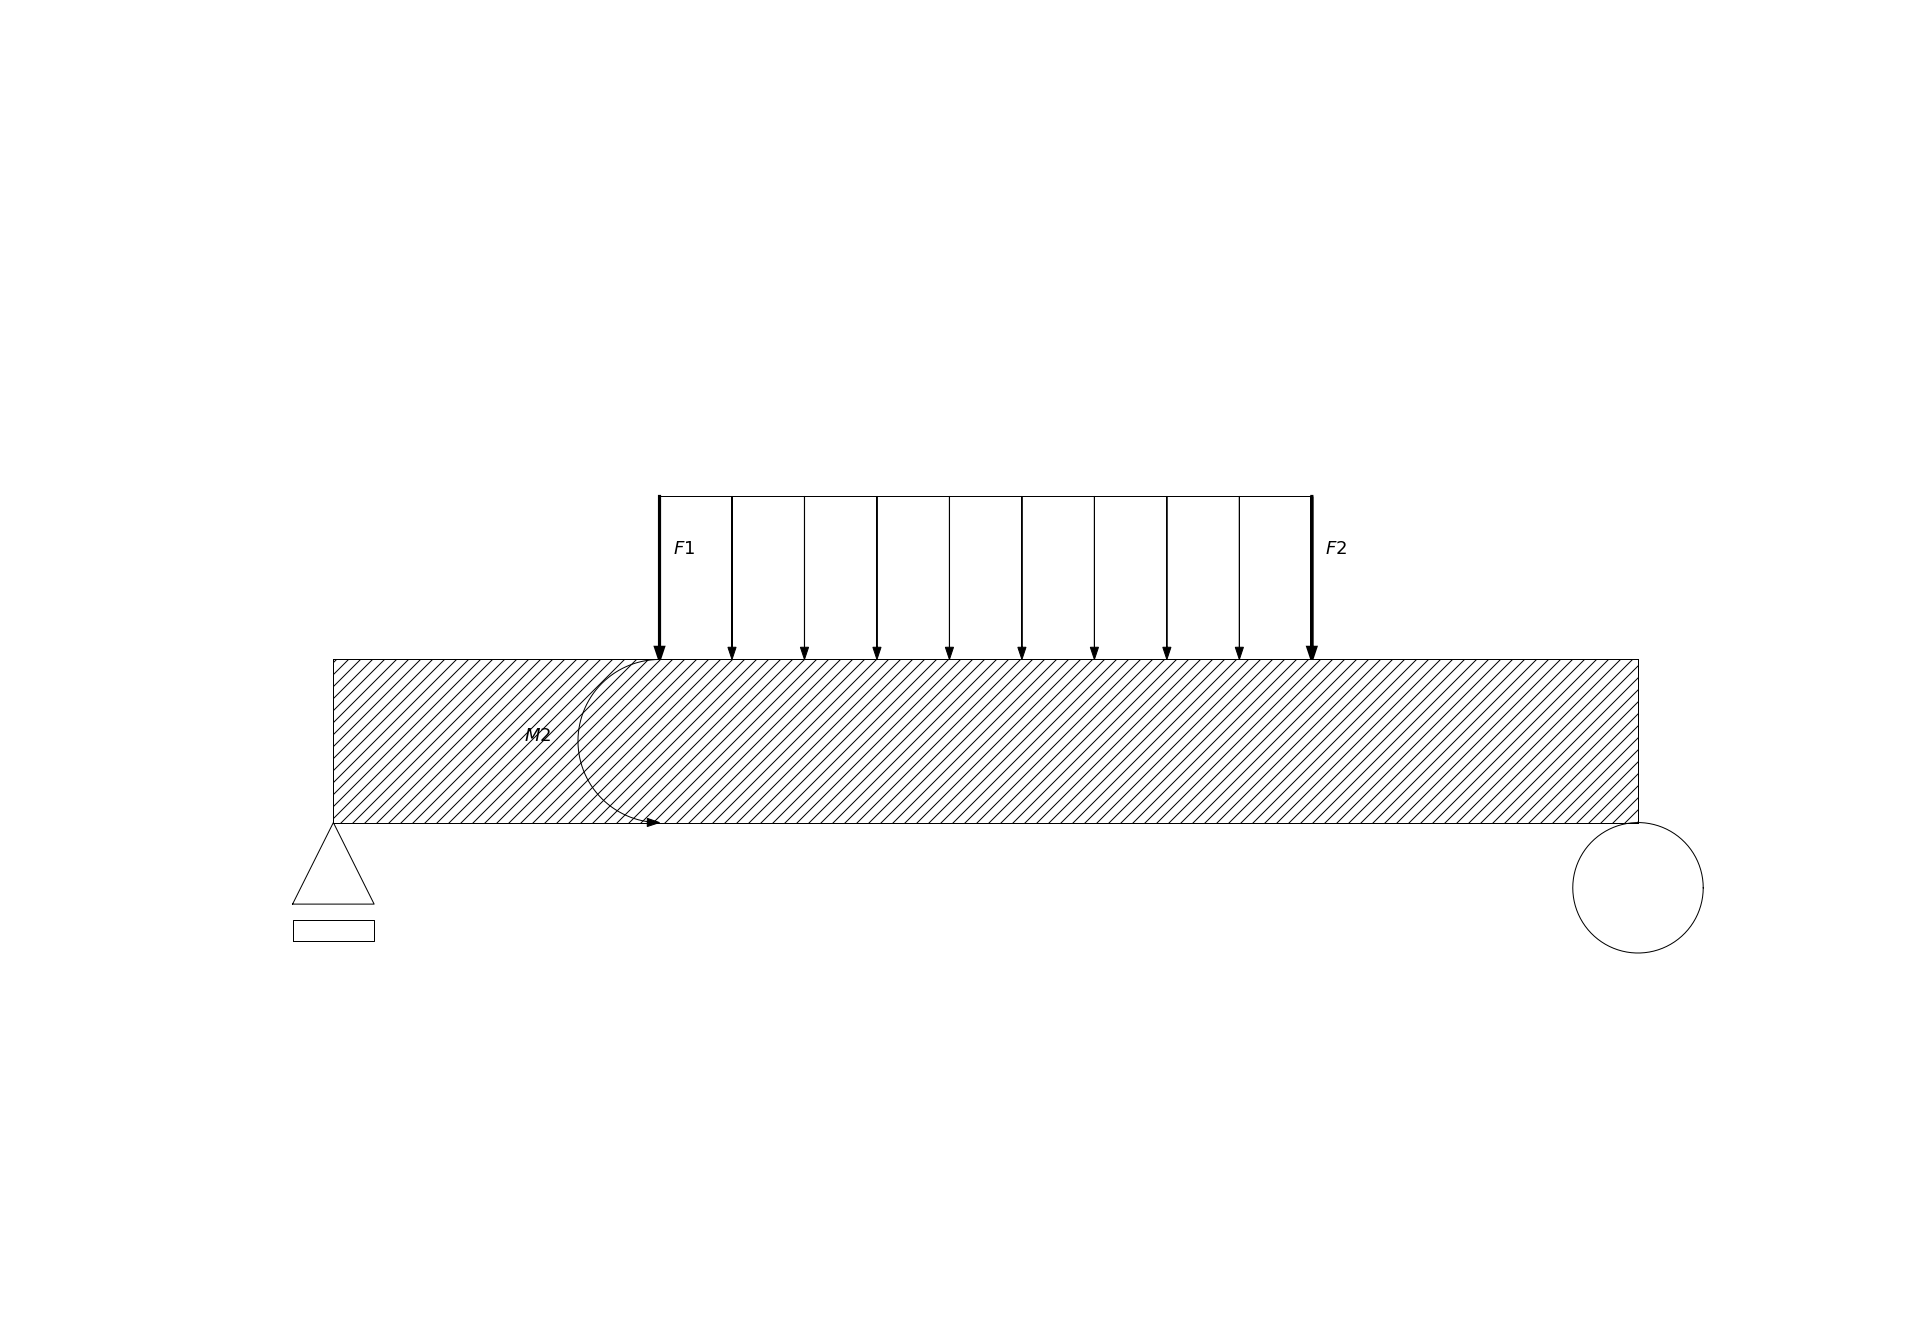

In [301]:
#Create the Beam Object
sick_beam = Beam(length = 8, height = 1)

#Adding forces onto the beam. It doesn't matter that order in which use these methods. 
sick_beam.point_force("F1",position = 2,magnitude= 2)
sick_beam.point_force("F2",position = 6,magnitude= 2)
sick_beam.uniform_load('UF1',start= 2,end = 6, distributed_load = 2)

#Adding Supports underneath the beam. The problem is limited to one fixed support
#Since adding more will make the problem statically indeterminate.
sick_beam.fixed_support('SUP1', position= 0)
sick_beam.roller_support('SUP2',position= 8)

#Add a couple onto the beam
sick_beam.moment('M2',position=2,magnitude=8)

#Once you've added the methods desired you can take a look at how the beam looks.
sick_beam.calculate_forces()
sick_beam.force_dictionary
sick_beam.moment_dictionary
sick_beam.diagrams()

# # # CURRENT PROJECT